## CSDCO File Assay
Beginning of a notebook to review the files available in CSDCO holdings

ToDo
* How to make the notebook more readable by hiding as much of the code away in something like a library

#### Breakdown globally

Name
OHIO-BONT14-2B-7L-1-W.pdf
ABS-ALLGN08-3B-1L-1.BMP
HSPDP-CHB14-2A-71Q-1-A.pdf
ACOW-WBL14-2B-2B-1-W.pdf
AAFBLP-LP06-5A-3HC-1.tif
1001-MCC11-1C-1F-1A.tif
1001-MCC11-2E-1F-2A and B_COMPOSITE.tif
OHIO-BONT14-1A-15L-1-W_darker.jpg
OHIO-15114-1B-12L-1-W_TEMPLATE.pdf
2203-TWTW15-2A-1P-1-W.pdf


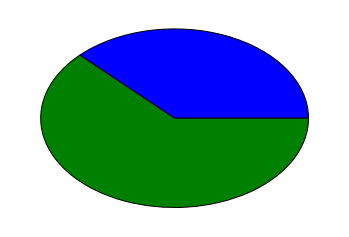

(([<matplotlib.patches.Wedge at 0x11195f790>,
   <matplotlib.text.Text at 0x11195fe50>]),
 None)

In [23]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import *

sparql = SPARQLWrapper("http://localhost:9999/blazegraph/namespace/ocdfx/sparql")
sparql.setQuery("""
SELECT ?uuid ?name ?location
WHERE 
{ 
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/fileuuid> ?uuid .
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/name> ?name .
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/FileLocation> ?location .
 }
LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

resultset = []
resultset.append(["UUID", "Name", "Location"])

for result in results["results"]["bindings"]:
    resultset.append([result["uuid"]["value"],result["name"]["value"],result["location"]["value"]])
   
# Can I put this in a panda data frame and do better searches and counting?
# import pandas as pd
# is there something like ext parser in Go in Python?

pdf = 3
jpg = 5
for item in resultset:
    print(item[1])   # parse out the extension and place into a count, then plot

n = (pdf,jpg)
pie(n), show()
#print(agemodel)

##### Project level breakdown

In [29]:
# Call on a specific project and review the available files
# Would be cool to break it down and also provide links to each file too for someone to click on

sparql = SPARQLWrapper("http://localhost:9999/blazegraph/namespace/ocdfx/sparql")
sparql.setQuery("""
SELECT ?name ?uuid
WHERE 
{ 
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/ProjectName> "OHIO" .
  ?uri <http://opencoredata.org/id/voc/csdco/v1/name> ?name .
  ?uri <http://opencoredata.org/id/voc/csdco/v1/fileuuid> ?uuid .
  }
  LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

resultset = []
resultset.append(["p", "o"])

for result in results["results"]["bindings"]:
    resultset.append([result["name"]["value"],result["uuid"]["value"]])
   
# Can I put this in a panda data frame and do better searches and counting?
# import pandas as pd
# is there something like ext parser in Go in Python?

for item in resultset:
    print(item[0])   # parse out the extension and place into a count, then plot



p
OHIO-BONT14-1C-15L-1-W.pdf
OHIO-15114-1B-9L-1-W_Darker.jpg
OHIO-BONT14-1C-9L-1-W.pdf
OHIO-15114-1B-12L-1-W.jpg
OHIO-15114-1B-2L-1-W.jpg
OHIO-15114-1D-1L-1-W.jpg
OHIO-BONT14-1A-14L-1-W.jpg
OHIO-BONT14-1A-6L-1-W.jpg
OHIO-15114-1C-9L-1-W.pdf
OHIO-BONT14-1A-10L-1-W.jpg


#### Index search

Make a call to the free text index to see what results look like here.
make a call to http://localhost:9800/ocdsearchapi/csdco/_search that needs to be POST  (?)

* Do I have the lat long for these?   I could map plot the results

If post is required the following is used

```
{"size":50,"from":0,"query":{"conjuncts":[{"boost":1,"query":"Core image"}]},"fields":["*"],"highlight":{"fields":["content"]}, "facets":{"Types":{"field":"opencore:site","size":5}}}
```